# Sales Data Analysis (Dummy data)

Having received a number of csv files containing Sales by month (Raw_Data folder), answer the following questions:

1. What was the best month for sales? How much was earned that month ?
2. What City had the highest number of sales ?
3. What time should we display advertisements to maximise likelihood of customer's buying product
4. What products are most often sold together ?
5. What products sold the most ? Why ?

In [1]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

## Pull data, and Clean it

1. Merge 12 months of sales data into a single data frame
2. Remove NAN observations
3. Change string types to numeric types in order to perform calcs
4. Add columns

In [2]:
def Get_Data():
    
    # Merge 12 months of sales data into a single file
    path = r'./Raw_Data/'                    
    all_files = glob.glob(os.path.join(path, "Sales_*.csv"))    

    df_from_each_file = (pd.read_csv(f) for f in all_files)
    df = pd.concat(df_from_each_file, ignore_index=True)
    
    ## Clean the data ##
    # Fix nan
    df = df.dropna(how='all') # if all cols are NAN
    # find 'or' values
    df = df[df['Order Date'].str[0:2] != 'Or']
    
    # make Numeric Types
    df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
    df["Price Each"] = pd.to_numeric(df["Price Each"])
    
    ## Add Columns ##
    df['Month'] = df["Order Date"].str[0:2]
    df['Month'] = df['Month'].astype('int32')
    df['Sales'] = df['Quantity Ordered'] * df['Price Each']
    
    # use RegEx to return string between 2 specific characters (,) 
    # df['City'] = df['Purchase Address'].str.extract(r",(.*),", expand=True)
    
    # Or, use apply ->
    # df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
    
    # actually, we need city and state. apply can use a function instead..
    def get_city(address):
        city = address.split(',')[1]
        state = address.split(',')[2].split(' ')[1]
        return f"{city} ({state})"
    #
    df['City'] = df['Purchase Address'].apply(lambda x: get_city(x))
    
    # convert to datetime
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    # Add Hour column
    df['Hour'] = df['Order Date'].dt.hour
    
    
    return df


In [3]:
df = Get_Data()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles (CA),14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin (TX),10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles (CA),17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle (WA),7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta (GA),19


## What was the best month for sales? How much was earned that month ?

In [4]:
df.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales,Hour
Month,,,,
1,10903,1.811768e+06,1.822257e+06,139485
2,13449,2.188885e+06,2.202022e+06,172669
3,17005,2.791208e+06,2.807100e+06,218969
4,20558,3.367671e+06,3.390670e+06,262259
5,18667,3.135125e+06,3.152607e+06,238780
6,15253,2.562026e+06,2.577802e+06,195528
7,16072,2.632540e+06,2.647776e+06,206169
8,13448,2.230345e+06,2.244468e+06,172289
9,13109,2.084992e+06,2.097560e+06,168513


In [5]:
res = df.groupby('Month').sum()

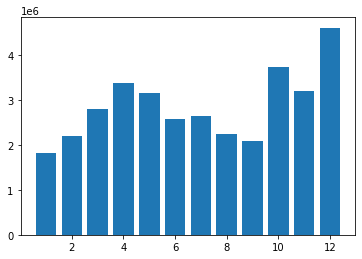

In [6]:
months = range(1,13)

plt.bar(months, res['Sales'])
plt.show()

## What City had the highest number of sales ?

In [7]:
df.groupby('City')['Sales'].sum()

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

<AxesSubplot:ylabel='City'>

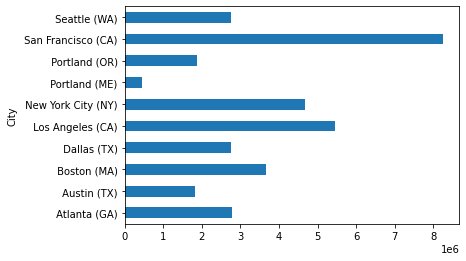

In [8]:
df.groupby('City')['Sales'].sum().plot(kind='barh')

Text(0.5, 0, 'City')

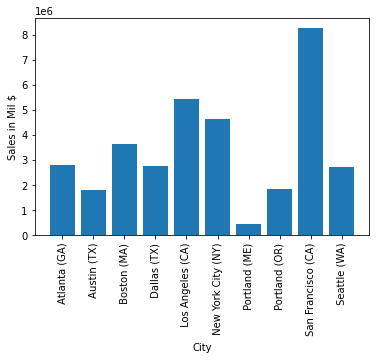

In [9]:
# another way to plot ->
res = df.groupby('City').sum()
# get x values
cities = [city for city, d in df.groupby('City')]

plt.bar(cities, res['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in Mil $')
plt.xlabel('City')

Text(0.5, 0, 'Sales in Mil $')

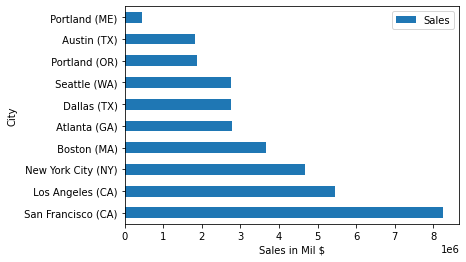

In [10]:
# reset the index: the old index is added as a column, and a new sequential index is used
df_flat = df.groupby('City')['Sales'].sum().reset_index()

# sort it by Global_Sales, and make a horizontal bar plot.
ax = df_flat.sort_values(['Sales'], ascending=False).plot(kind='barh', y='Sales', x='City')
ax.set_ylabel("City")
ax.set_xlabel("Sales in Mil $")

## What time should we display advertisements to maximise likelihood of customer's buying product ?

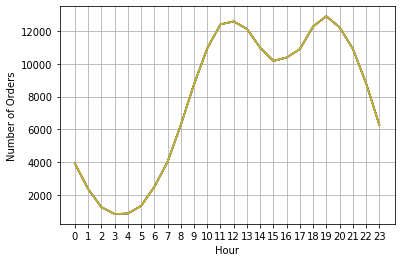

In [11]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

## What products are most often sold together ?

If two rows have the same order ID, they were purchased together

In [12]:
# just use the duplicated orders

dup = df[df['Order ID'].duplicated(keep=False)] # keep all dups
# create column on grouped products
dup['Grouped'] = dup.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

# remove duplicated order ids and their groups
dup = dup[['Order ID', 'Grouped']].drop_duplicates()
dup.head()

,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"


In [13]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()
for row in dup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # most common '2' together

count.most_common(5)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

In [14]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What products sold the most ? Why ?

Sum up the quantity ordered, grouping by the Product

Text(0.5, 0, 'Quantity Ordered')

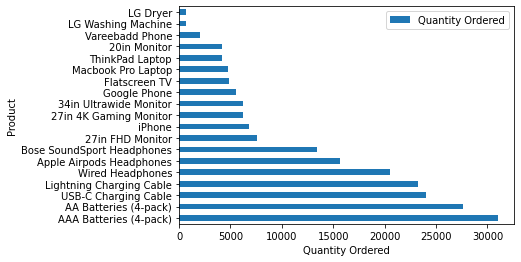

In [15]:
# reset the index: the old index is added as a column, and a new sequential index is used
df_flat = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# sort it by Global_Sales, and make a horizontal bar plot.
ax = df_flat.sort_values(['Quantity Ordered'], ascending=False).plot(kind='barh', y='Quantity Ordered', x='Product')
ax.set_ylabel("Product")
ax.set_xlabel("Quantity Ordered")



#df.groupby('Product')['Quantity Ordered'].sum().plot(kind='barh')


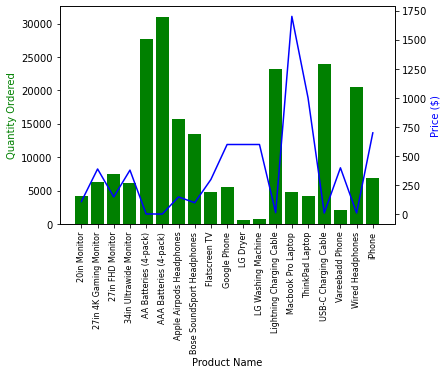

In [17]:
# Prices are impacting order qty. When the price is high the orders are low and vice versa
import warnings
warnings.filterwarnings("ignore")

product_grp = df.groupby('Product')
qty_ordered = product_grp.sum()['Quantity Ordered']
products = [product for product, p in product_grp]

prices = df.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, qty_ordered, color='g')

ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()